<a href="https://colab.research.google.com/github/KinsalMaties/Lern_ILH/blob/ilkhamiya/Task6_ilkh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Загрузка данных из файла
data = pd.read_csv("titanic_train.csv")

In [3]:
data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN


In [4]:
# Определяем количество пропущенных значений в столбце "age"
missing_age = data['age'].isnull().sum()

# Выводим ответ
print("Количество пропущенных значений в столбце 'age':", missing_age)

Количество пропущенных значений в столбце 'age': 199


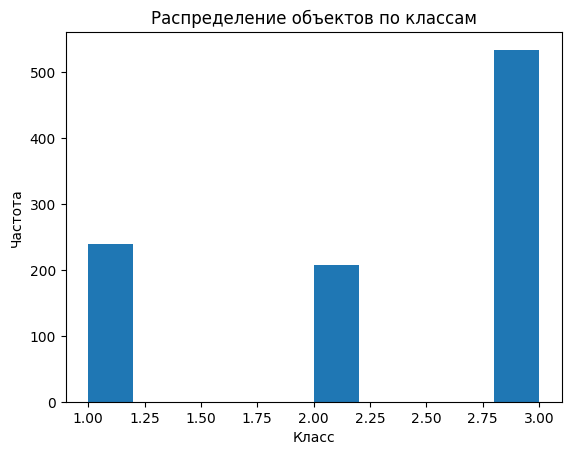

Доля выживших: 0.382


In [5]:
# Построение гистограммы распределения объектов по классам
plt.hist(data['pclass'])
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.title('Распределение объектов по классам')
plt.show()

# Расчет доли выживших
survival_proportion = data['survived'].mean()

# Выводим ответ
print("Доля выживших:", round(survival_proportion, 3))

In [6]:
# Определение пропорции пропущенных значений в каждом признаке
missing_proportion = data.isnull().mean()

# Удаление признаков, где пропорция пропущенных значений больше трети и столбца с билетами
threshold = 1/3
columns_to_drop = missing_proportion[missing_proportion > threshold].index.tolist()
columns_to_drop.append('ticket')
data_cleaned = data.drop(columns=columns_to_drop)

# Создание нового признака fam_size
data_cleaned['fam_size'] = data_cleaned['sibsp'] + data_cleaned['parch']

# Расчет среднего значения столбца fam_size
mean_fam_size = data_cleaned['fam_size'].mean()

# Выводим ответ
print("Среднее значение столбца fam_size:", round(mean_fam_size, 3))


Среднее значение столбца fam_size: 0.866


In [7]:
# Вычисление количества предикторов в полученном наборе данных
num_predictors = data_cleaned.shape[1] - 1  # Вычитаем один, так как один столбец - это целевая переменная (survived)

# Выводим ответ
print("Количество предикторов в полученном наборе данных:", num_predictors)


Количество предикторов в полученном наборе данных: 9


In [8]:
# Оценка вероятности выживания пассажира в заданной категории
female_pclass2_survival_prob = data_cleaned[(data_cleaned['sex'] == 'female') & (data_cleaned['pclass'] == 3)]['survived'].mean()

# Выводим ответ
print("Вероятность выживания пассажира в заданной категории:", round(female_pclass2_survival_prob, 3))

Вероятность выживания пассажира в заданной категории: 0.503


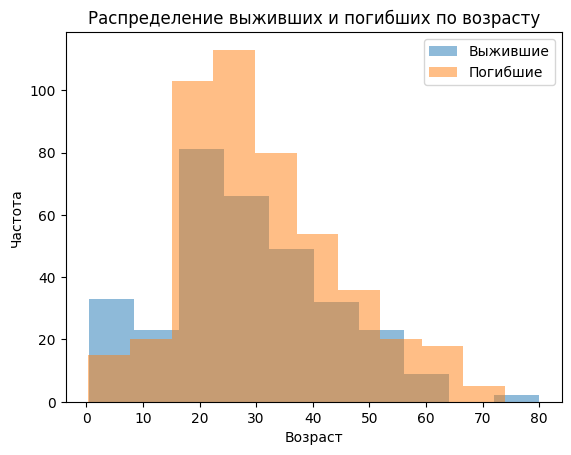

In [9]:
# Построение гистограммы выживших и погибших по возрасту
plt.hist(data_cleaned[data_cleaned['survived'] == 1]['age'], alpha=0.5, label='Выжившие')
plt.hist(data_cleaned[data_cleaned['survived'] == 0]['age'], alpha=0.5, label='Погибшие')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение выживших и погибших по возрасту')
plt.legend()
plt.show()

In [11]:
# Удаление строк с пропущенными значениями
data_numeric = data_cleaned.select_dtypes(include='number').copy()
data_numeric.dropna(inplace=True)

# Замена значений 0 и 1 в столбце 'survived' на False и True соответственно
data_numeric['survived'] = data_numeric['survived'].replace({0: False, 1: True})

# Преобразование типа столбца 'survived' в категориальный
data_numeric['survived'] = data_numeric['survived'].astype('category')

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = data_numeric.drop(columns=['survived'])
y = data_numeric['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Обучение модели логистической регрессии на обучающем наборе данных
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка модели на тестовом наборе данных
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Выводим ответ
print("F1 score на тестовом наборе данных:", f1)


F1 score на тестовом наборе данных: 0.5490196078431372


In [12]:
# Выбор только числовых признаков из исходного набора данных
data_numeric = data_cleaned.select_dtypes(include='number').copy()

# Заполнение пропущенных значений средним значением столбца
data_numeric.fillna(data_numeric.mean(), inplace=True)

# Разделение данных на обучающую и тестовую выборки
X = data_numeric.drop(columns=['survived'])
y = data_cleaned['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Обучение модели логистической регрессии на обучающем наборе данных
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка модели на тестовом наборе данных
y_pred = model.predict(X_test)
f1_mean_fill = f1_score(y_test, y_pred)

# Выводим ответ
print("F1 score на тестовом наборе данных после заполнения пропущенных значений средним:", round(f1_mean_fill, 3))

F1 score на тестовом наборе данных после заполнения пропущенных значений средним: 0.508


In [12]:
# # Выбор числовых признаков и столбца "name" из исходного набора данных
# data_with_honorific = data_cleaned.select_dtypes(include='number').copy()
# data_with_honorific['name'] = data_cleaned['name']

# # Извлечение обращений из столбца "name" с помощью регулярного выражения
# import re

# def extract_honorific(name):
#     match = re.search(r',\s([^\.]+)\.', name)
#     if match:
#         return match.group(1)
#     else:
#         return None

# data_with_honorific['honorific'] = data_with_honorific['name'].apply(extract_honorific)

# # Вычисление количества уникальных обращений
# num_unique_honorifics = data_with_honorific['honorific'].nunique()

# # Выводим ответ
# print("Количество уникальных обращений:", num_unique_honorifics)


Количество уникальных обращений: 14


In [13]:
# Создание столбца "honorific" на основе обращений в именах
data_with_honorific = data_cleaned.copy()
data_with_honorific['honorific'] = data_with_honorific['name'].str.extract(r',\s*([^\.]+)\.', expand=False)

# Вычисление количества уникальных обращений
num_unique_honorifics = data_with_honorific['honorific'].nunique()

# Выводим ответ
print("Количество уникальных обращений:", num_unique_honorifics)

Количество уникальных обращений: 14


In [14]:
# Создание бинарного столбца, где 1 - обращение "Master", 0 - другие обращения
data_with_honorific['is_master'] = (data_with_honorific['honorific'] == 'Master').astype(int)

# Вычисление доли строк со значением "Master" относительно общего числа мужчин
proportion_master = data_with_honorific[data_with_honorific['sex'] == 'male']['is_master'].mean()

# Выводим ответ
print("Доля строк со значением 'Master' относительно общего числа мужчин:", round(proportion_master, 3))


Доля строк со значением 'Master' относительно общего числа мужчин: 0.072


In [15]:
# Вычисление среднего возраста категории Mr.
average_age_mrs = data_with_honorific[data_with_honorific['honorific'] == 'Mr']['age'].mean()

# Выводим ответ
print("Средний возраст категории Mr.:", round(average_age_mrs, 3))

Средний возраст категории Mr.: 32.352


In [16]:
# Заполнение пропущенных значений в столбце "age" средним значением по категории обращения
data_with_honorific['age'] = data_with_honorific.groupby('honorific')['age'].transform(lambda x: x.fillna(x.mean()))

# Удаление нечисловых признаков
data_numeric_honorific = data_with_honorific.select_dtypes(include='number')

# Разделение данных на обучающую и тестовую выборки
X = data_numeric_honorific.drop(columns=['survived'])
y = data_with_honorific['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Обучение модели логистической регрессии на обучающем наборе данных
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка модели на тестовом наборе данных
y_pred = model.predict(X_test)
f1_score_honorific = f1_score(y_test, y_pred)

# Выводим ответ
print("F1 score модели на тестовом наборе данных после заполнения пропущенных значений средним по категории обращения:", round(f1_score_honorific, 3))

F1 score модели на тестовом наборе данных после заполнения пропущенных значений средним по категории обращения: 0.472


In [17]:
# Заполнение пропущенных значений в столбце "age" средним значением по категории обращения
data_with_honorific['age'] = data_with_honorific.groupby('honorific')['age'].transform(lambda x: x.fillna(x.mean()))

# Удаление признаков "name" и "honorific"
data_encoded = data_with_honorific.drop(columns=['name', 'honorific'])

# Применение One-Hot Encoding к категориальным признакам
data_encoded = pd.get_dummies(data_encoded, columns=['sex', 'embarked'])

# Разделение данных на обучающую и тестовую выборки
X = data_encoded.drop(columns=['survived'])
y = data_encoded['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Обучение модели логистической регрессии на обучающем наборе данных
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка модели на тестовом наборе данных
y_pred = model.predict(X_test)
f1_score_categorical = f1_score(y_test, y_pred)

# Выводим ответ
print("F1 score модели на тестовом наборе данных после кодирования категориальных признаков:", round(f1_score_categorical, 3))

F1 score модели на тестовом наборе данных после кодирования категориальных признаков: 0.747


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
